< [Distance and Similarity](../ica07/Cluster_Analysis.ipynb) | Contents (TODO)

<a href="https://colab.research.google.com/github/stephenbaek/bigdata/blob/master/in-class-assignments/ica08/Neural_Networks.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

# Introduction to Artificial Neural Networks

Artificial neural networks (ANN) have been around since 1950's but they gained popularity only very recently. ANNs are, in some sense, a stack of linear systems of equations, connected via a *computational graph*. The basic building block of ANNs is a neural network layer, representing a unit comprised of a linear system of equations. By connecting these layers, you can "design" an architecture of a neural network model. 

## 1. TensorFlow

There are many software packages with pre-defined neural network functions. One of the most popular neural network packages is `TensorFlow`. TensorFlow was initially conceived as an internal project at Google, but it became an open source project from 2015. Since then, with the hype of deep learning research, TensorFlow has been vigorously used by research communities and industry, enabling the creation of a large number of project. In this lab, we will take a look at some of the basics of TensorFlow.

### 1.1. Installation
(IF YOU'RE USING COLAB, YOU CAN SKIP THIS STEP)

For the installation of TensorFlow, most of the cases, you can simply type `pip install tensorflow`. There is a GPU accelerated version of TensorFlow available, and can be installed via `pip install tensorflow-gpu`. For the GPU installation, you need CUDA and CuDNN installed on your computer. For the details, consult https://www.tensorflow.org/install. TensorFlow is a large library with many dependencies and subpackages, so the installation may take a while.

In [1]:
# You DO NOT need to run this cell if you're running this notebook on Colab.
# This take some time. Be patient...
!pip install tensorflow
#!pip install tensorflow-gpu  # to install GPU version, comment the above line and uncomment this line instead.

### 1.2. Getting Started
TensorFlow can be imported by simply calling `import tensorflow as tf`. 

In [3]:
import tensorflow as tf
tf.__version__

'2.0.0'

To some extent, TensorFlow is similar to NumPy:

In [5]:
a = 3
b = 4
c = tf.add(a, b)
print(c)

tf.Tensor(7, shape=(), dtype=int32)


Note that the return type of the above code is `tf.Tensor`. Tensors are, mathematically, generalization of vectors and matrices to arbitrary dimensions. Many of the neural network computations are formulated based on tensors. To convert a tensor value to a numpy array, you can call:

In [6]:
c.numpy()

7

## 2. MNIST Hand-written Digit Recognition

Modified National Institute of Science and Technology Hand-written Digit Data Set (MNIST) is one of the most popular "hello world" data set for data scientists. It is comprised of  

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

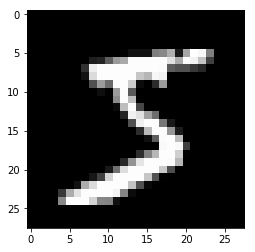

In [0]:
plt.imshow(X_train[0], cmap='gray')

In [0]:
model = tf.keras.models.Sequential()
model.add( tf.keras.layers.Flatten(input_shape=(28,28)) )
model.add( tf.keras.layers.Dense(200, activation='sigmoid') )
model.add( tf.keras.layers.Dense(10, activation='softmax') )
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile('SGD', loss='sparse_categorical_crossentropy', metrics=['acc'])
model.fit(X_train, Y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 104us/sample - loss: 1.3918 - acc: 0.7087
Epoch 2/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.6753 - acc: 0.8502
Epoch 3/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.5090 - acc: 0.8737
Epoch 4/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.4391 - acc: 0.8853
Epoch 5/5
60000/60000 [==============================] - 5s 86us/sample - loss: 0.4005 - acc: 0.8915


array([[3.1901317e-04, 1.1946832e-05, 1.5363103e-04, 1.3885703e-03,
        8.9501074e-05, 2.4149164e-04, 3.2773303e-06, 9.9280906e-01,
        5.7906167e-05, 4.9256049e-03]], dtype=float32)

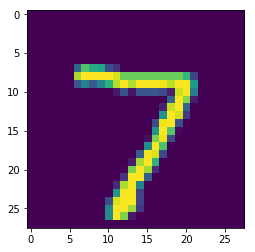

In [0]:
plt.imshow(X_test[0])
model.predict(X_test[0:1])

In [0]:
model.evaluate(X_test, Y_test)

< [Distance and Similarity](../ica07/Cluster_Analysis.ipynb) | Contents (TODO)

<a href="https://colab.research.google.com/github/stephenbaek/bigdata/blob/master/in-class-assignments/ica08/Neural_Networks.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>